In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  metrics
from sklearn import datasets
import warnings

In [11]:
warnings.filterwarnings('ignore')

## Label Propagation

In [12]:
def load_data():
    digits = datasets.load_digits()
    ######   混洗样本　########
    rng = np.random.RandomState(0)
    indices = np.arange(len(digits.data)) # 样本下标集合
    rng.shuffle(indices) # 混洗样本下标集合
    X = digits.data[indices]
    y = digits.target[indices]
    ###### 生成未标记样本的下标集合 ####
    n_labeled_points = int(len(y)/10) # 只有 10% 的样本有标记
    unlabeled_indices = np.arange(len(y))[n_labeled_points:] # 后面 90% 的样本未标记

    return X,y,unlabeled_indices

In [13]:
from sklearn.semi_supervised import LabelPropagation

def test_LabelPropagation(*data):
    X,y,unlabeled_indices = data
    y_train = np.copy(y) # 必须拷贝，后面要用到 y
    y_train[unlabeled_indices] = -1 # 未标记样本的标记设定为 -1
    clf = LabelPropagation(max_iter=100,kernel='rbf',gamma=0.1)
    clf.fit(X,y_train)
    ### 获取预测准确率
    predicted_labels = clf.transduction_[unlabeled_indices] # 预测标记
    true_labels = y[unlabeled_indices] # 真实标记
    print("Accuracy:%f"%clf.score(X[unlabeled_indices],true_labels))
    
data=load_data() # 获取半监督分类数据集
test_LabelPropagation(*data) # 调用 test_LabelPropagation

Accuracy:0.948084


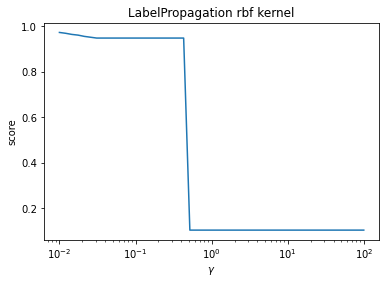

In [18]:
def test_LabelPropagation_rbf(*data):
    '''
    测试 LabelPropagation 的 rbf 核时，预测性能随 alpha 和 gamma 的变化

    :param data: 一个元组，依次为： 样本集合、样本标记集合、 未标记样本的下标集合
    :return: None
    '''
    X,y,unlabeled_indices=data
    y_train=np.copy(y) # 必须拷贝，后面要用到 y
    y_train[unlabeled_indices] = -1 # 未标记样本的标记设定为 -1

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    gammas=np.logspace(-2,2,num=50)

    ## 训练并绘图
    scores=[]
    for gamma in gammas:
        clf=LabelPropagation(max_iter=100,gamma=gamma,kernel='rbf')
        clf.fit(X,y_train)
        scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
    ax.plot(gammas,scores)

    ### 设置图形
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_xscale("log")
    ax.set_title("LabelPropagation rbf kernel")
    plt.show()
    
data = load_data()
test_LabelPropagation_rbf(*data)

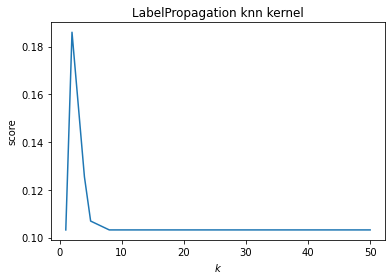

In [21]:
def test_LabelPropagation_knn(*data):
    '''
   测试 LabelPropagation 的 knn 核时，预测性能随 alpha 和 n_neighbors 的变化

    :param data:  一个元组，依次为： 样本集合、样本标记集合、 未标记样本的下标集合
    :return:  None
    '''
    X,y,unlabeled_indices=data
    y_train=np.copy(y) # 必须拷贝，后面要用到 y
    y_train[unlabeled_indices]=-1 # 未标记样本的标记设定为 -1

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    alphas=np.linspace(0.01,1,num=10,endpoint=True)
    Ks=[1,2,3,4,5,8,10,15,20,25,30,35,40,50]
    ## 训练并绘图
    scores=[]
    for K in Ks:
        clf=LabelPropagation(max_iter=100,n_neighbors=K,kernel='knn')
        clf.fit(X,y_train)
        scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
    ax.plot(Ks,scores)

    ### 设置图形
    ax.set_xlabel(r"$k$")
    ax.set_ylabel("score")
    ax.set_title("LabelPropagation knn kernel")
    plt.show()
    
test_LabelPropagation_knn(*data)

## Label Spreading

In [22]:
from sklearn.semi_supervised.label_propagation import LabelSpreading

def test_LabelSpreading(*data):
    '''
    测试 LabelSpreading 的用法

    :param data: 一个元组，依次为： 样本集合、样本标记集合、 未标记样本的下标集合
    :return: None
    '''
    X,y,unlabeled_indices=data
    y_train=np.copy(y) # 必须拷贝，后面要用到 y
    y_train[unlabeled_indices]=-1 # 未标记样本的标记设定为 -1
    clf=LabelSpreading(max_iter=100,kernel='rbf',gamma=0.1)
    clf.fit(X,y_train)
    ### 获取预测准确率
    predicted_labels = clf.transduction_[unlabeled_indices] # 预测标记
    true_labels = y[unlabeled_indices] # 真实标记
    print("Accuracy:%f"%metrics.accuracy_score(true_labels,predicted_labels))
    
test_LabelSpreading(*data)

Accuracy:0.972806


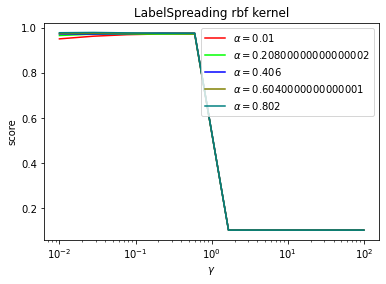

In [24]:
def test_LabelSpreading_rbf(*data):
    X,y,unlabeled_indices=data
    y_train=np.copy(y) # 必须拷贝，后面要用到 y
    y_train[unlabeled_indices]=-1 # 未标记样本的标记设定为 -1

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    alphas=np.linspace(0.01,1,num=5,endpoint=False)
    gammas=np.logspace(-2,2,num=10)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同曲线用不同颜色
    ## 训练并绘图
    for alpha,color in zip(alphas,colors):
        scores=[]
        for gamma in gammas:
            clf=LabelSpreading(max_iter=100,gamma=gamma,alpha=alpha,kernel='rbf')
            clf.fit(X,y_train)
            scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
        ax.plot(gammas,scores,label=r"$\alpha=%s$"%alpha,color=color)

    ### 设置图形
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_xscale("log")
    ax.legend(loc="best")
    ax.set_title("LabelSpreading rbf kernel")
    plt.show()
    
test_LabelSpreading_rbf(*data)

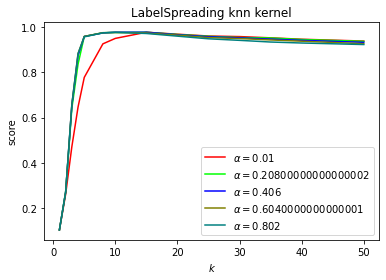

In [25]:
def test_LabelSpreading_knn(*data):
    X,y,unlabeled_indices=data
    y_train=np.copy(y) # 必须拷贝，后面要用到 y
    y_train[unlabeled_indices]=-1 # 未标记样本的标记设定为 -1

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    alphas=np.linspace(0.01,1,num=5,endpoint=False)
    Ks=[1,2,3,4,5,8,10,15,20,25,30,35,40,50]
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同曲线用不同颜色
    ## 训练并绘图
    for alpha,color in zip(alphas,colors):
        scores=[]
        for K in Ks:
            clf=LabelSpreading(kernel='knn',max_iter=100,n_neighbors=K,alpha=alpha)
            clf.fit(X,y_train)
            scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
        ax.plot(Ks,scores,label=r"$\alpha=%s$"%alpha,color=color)

    ### 设置图形
    ax.set_xlabel(r"$k$")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("LabelSpreading knn kernel")
    plt.show()
    
test_LabelSpreading_knn(*data)